In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
import torchvision
from torchvision import datasets, transforms

import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
train_data = datasets.MNIST(root='../data', train=True,transform=transforms.ToTensor(), download=True)
test_data = datasets.MNIST(root = '../data', train=False, transform=transforms.ToTensor(), download=True)

print(len(train_data), len(test_data))

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw

60000 10000


torch.Size([1, 28, 28]) 5


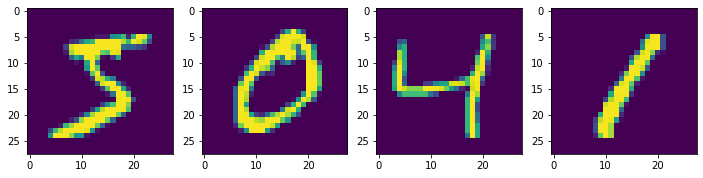

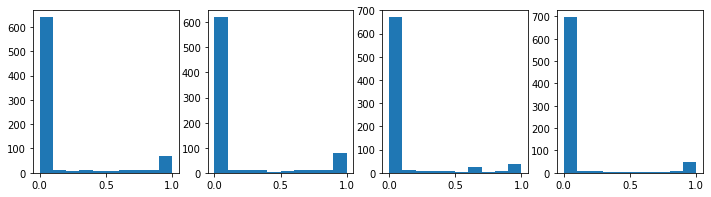

In [3]:
image, label = train_data[0]
print(image.shape, label)

to_show = 4
size = 3
plt.figure(figsize=(size * to_show, size))
for i in range(to_show):
  plt.subplot(1, to_show, i + 1)
  plt.imshow(train_data[i][0][0])
plt.show()

plt.figure(figsize=(size * to_show, size))
for i in range(to_show):
  plt.subplot(1, to_show, i + 1)
  plt.hist(train_data[i][0][0].flatten())
plt.show()

In [4]:
batch_size = 32
num_workers = 0

train_dl = DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=num_workers)
test_dl = DataLoader(test_data, batch_size=batch_size, shuffle=False, num_workers=num_workers)

print(len(train_dl), len(test_dl))

for image, labels in train_dl:
  print(image.shape, labels.shape)
  break

1875 313
torch.Size([32, 1, 28, 28]) torch.Size([32])


In [5]:
class DenseNet(nn.Module):
  def __init__(self, im_shape, hidden, num_classes=10):
    super().__init__()
    
    input_size = im_shape[0] * im_shape[1] * im_shape[2]

    self.linear1 = nn.Linear(input_size, hidden)
    self.act1 = nn.ReLU()
    self.linear2 = nn.Linear(hidden, num_classes)

  def forward(self, x):
    x = x.view(x.shape[0], -1)
    x = self.linear1(x)
    x = self.act1(x)
    x = self.linear2(x)
    return x

im_shape = (1, 28, 28)
hidden = 256
num_classes = 10

net = DenseNet(im_shape, hidden, num_classes)
print(net)

DenseNet(
  (linear1): Linear(in_features=784, out_features=256, bias=True)
  (act1): ReLU()
  (linear2): Linear(in_features=256, out_features=10, bias=True)
)


In [6]:
lr = 0.003

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=lr)

In [9]:
#test_net(net, test_dl)

100%|██████████| 1875/1875 [00:12<00:00, 152.11it/s]


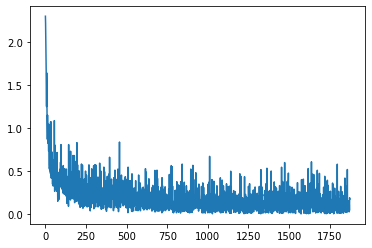

In [10]:
net.train()
losses = list()
for images, labels in tqdm(train_dl):
  logits = net(images)
  loss = criterion(logits, labels)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  losses.append(loss.item())

plt.plot(losses)
plt.show()

In [11]:
def test_net(net, test_dl):
  dl_logits = list()
  dl_labels = list()
  net.eval()
  for images, labels in tqdm(test_dl):
    logits = net(images)  
    dl_logits.append(logits)
    dl_labels.append(labels)

  dl_logits = torch.concat(dl_logits)
  dl_labels = torch.concat(dl_labels)

  predicts = torch.argmax(dl_logits, dim=1)
  accuracy = (dl_labels == predicts).float().mean()
  return accuracy

In [12]:
accuracy = test_net(net, test_dl)
accuracy

100%|██████████| 313/313 [00:01<00:00, 265.79it/s]


tensor(0.9676)